In [1]:
from src.utils_py.auxil import *
import numpy as np
import matplotlib.pyplot as plt

---

# Проверка формул на предельных случаях

In [2]:
S_theta = [S_droplet_theta, S_doughnut_theta, S_worm_theta, S_roll_theta, S_perforation_theta, S_layer_theta]
min_theta = [phi_min_droplet_theta, phi_min_doughnut_theta, phi_min_worm_theta, phi_min_roll_theta, phi_min_perforation_theta, phi_min_layer_theta]
max_theta = [phi_max_droplet_theta, phi_max_doughnut_theta, phi_max_worm_theta, phi_max_roll_theta, phi_max_perforation_theta, phi_max_layer_theta]

S_delta = [S_droplet_delta, S_doughnut_delta, S_worm_delta, S_roll_delta, S_perforation_delta, S_layer_delta]
min_delta = [phi_min_droplet_delta, phi_min_doughnut_delta, phi_min_worm_delta, phi_min_roll_delta, phi_min_perforation_delta, phi_min_layer_delta]
max_delta = [phi_max_droplet_delta, phi_max_doughnut_delta, phi_max_worm_delta, phi_max_roll_delta, phi_max_perforation_delta, phi_max_layer_delta]

S_180 = [S_droplet_180, S_doughnut_180, S_worm_180, S_roll_180, S_perforation_180, S_layer_180]
min_180 = [phi_min_droplet_180, phi_min_doughnut_180, phi_min_worm_180, phi_min_roll_180, phi_min_perforation_180, phi_min_layer_180]
max_180 = [phi_max_droplet_180, phi_max_doughnut_180, phi_max_worm_180, phi_max_roll_180, phi_max_perforation_180, phi_max_layer_180]

In [3]:
f = open('output_delta.txt', 'w')

for type_id in range(len(S_delta)):
    # type_id = '_'.join(type.split('_')[:2])
    print(S_delta[type_id].__name__, file=f)
    print('{:>5}{:>5} |{:>15}{:>15}{:>15}{:>10}{:>10} |{:>10}{:>10}{:>10}{:>10}{:>10} |{:>10}{:>10}{:>10}{:>10}{:>10}'.format('phi', 'l', 'S_delta', 'S_theta', 'S_180', 'err_S_dt', 'err_S_dpi', 'min_delta', 'min_theta', 'min_180', 'err_min_dt', 'err_min_dpi', 'max_delta', 'max_theta', 'max_180', 'err_max_dt', 'err_min_dpi'), file=f)
    print('–'*183, file=f)
    # print('{:>5}{:>5}{:>15}{:>15}'.format('l', 'phi', 'S_general', 'S_180'))
    for phi in np.arange(0, 1.1, 0.2):
        for l in np.arange(0.1, 5, 0.5):
                S_d = S_delta[type_id](l, phi, 0)
                phi_min_delta = min_delta[type_id](l, 0)
                phi_max_delta = max_delta[type_id](l, 0)

                S_t = S_theta[type_id](l, phi, np.pi)
                phi_min_theta = min_theta[type_id](l, np.pi)
                phi_max_theta = max_theta[type_id](l, np.pi)

                S_pi = S_180[type_id](l, phi)
                phi_min_180 = min_180[type_id](l)
                phi_max_180 = max_180[type_id](l)
                # print('{:>5.1f}{:>5.1f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}{:>15.5f}'.format(l, phi, gen, part, gen[1][0], part[1][0], gen[1][1], part[1][1]))
                print('{:>5.1f}{:>5.1f} |{:>15.5f}{:>15.5f}{:>15.5f}{:>10.3f}{:>10.3f} |{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f} |{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f}{:>10.3f}'.format(
                    phi, l,
                    S_d, S_t, S_pi, abs(S_d - S_t), abs(S_d - S_pi),
                    phi_min_delta, phi_min_theta, phi_min_180, abs(phi_min_delta - phi_min_theta), abs(phi_min_delta - phi_min_180),
                    phi_max_delta, phi_max_theta, phi_max_180, abs(phi_max_delta - phi_max_theta), abs(phi_max_delta - phi_max_180)),
                file=f)
                # print('{:>5.1f}{:>5.1f}{:>15.5f}{:>15.5f}'.format(l, phi, gen, part))
    print(file=f)

f.close()

---

# Проверка профилей плотности

0.5997568632845283


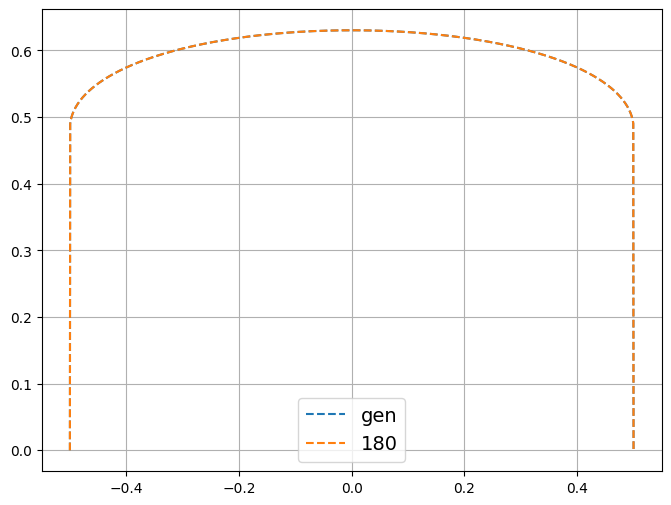

In [4]:
l = 8
phi = 0.6
z = np.linspace(-0.5, 0.5, 2000, endpoint=True)

rho_gen = rho_perforation(z, l, phi, np.deg2rad(180))
rho_180 = rho_perforation_180(z, l, phi)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(z, rho_gen, '--', label='gen')
plt.plot(z, rho_180, '--', label='180')
plt.legend(fontsize=14)

print(np.trapz(rho_gen, z))
# print('S_gen:', np.trapz(rho_gen, z))
# print('S_180:', np.trapz(rho_180, z))
# print('Err:  ', np.trapz(np.abs(rho_gen - rho_180, z)))

---

# Вид профиля плотности при различных углах

S_delta:  0.50007
S_delta:  0.50003
S_delta:  0.49979
S_delta:  0.50038


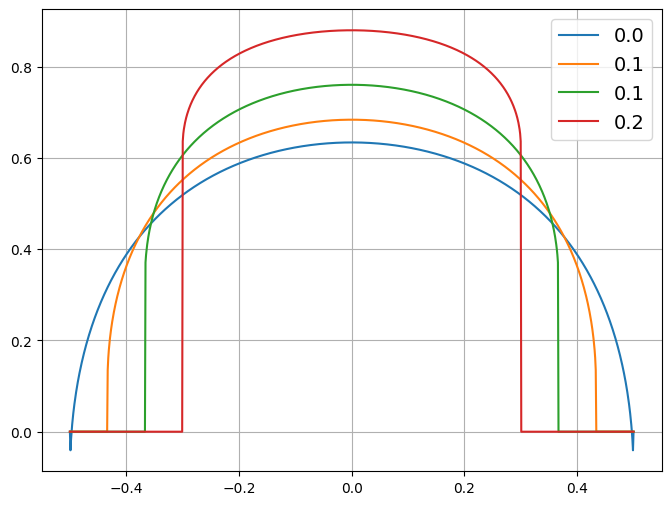

In [4]:
l = 2
phi = 0.5
z = np.linspace(-0.5, 0.5, 1000, endpoint=True)

# theta = np.linspace(np.deg2rad(90.1), pi, 10)
delta = np.linspace(0, 0.2, 4, endpoint=True)

plt.figure(figsize=(8, 6))
plt.grid()

# for th in theta:
for d in delta:
    rho = rho_perforation_delta(z, l, phi, d)
    # plt.plot(z, rho, label='{:.1f}'.format(np.rad2deg(th)))
    # print('S_{:.1f}:  {:.5f}'.format(np.rad2deg(th), np.trapz(rho, z)))
    plt.plot(z, rho, label='{:.1f}'.format(d))
    print('S_{}:  {:.5f}'.format('delta', np.trapz(rho, z)))
plt.legend(fontsize=14)
plt.show()

# Вид профиля плотности при различных delta

l = 2
phi = 0.1
z = np.linspace(-0.5, 0.5, 1000, endpoint=True)

# theta = np.linspace(np.deg2rad(90.1), pi, 10)
delta = np.linspace(0, 0.25, 5, endpoint=True)

plt.figure(figsize=(8, 6))
plt.grid()

# for th in theta:
for d in delta:
    rho = rho_roll_delta(z, l, phi, d)
    # plt.plot(z, rho, label='{:.1f}'.format(np.rad2deg(th)))
    # print('S_{:.1f}:  {:.5f}'.format(np.rad2deg(th), np.trapz(rho, z)))
    plt.plot(z, rho, label='{:.1f}'.format(d))
    print('S_{}:  {:.5f}'.format('delta', np.trapz(rho, z)))
plt.legend(fontsize=14)
plt.show()